<a href="https://colab.research.google.com/github/Hiroki-Abe/Weibull_curve_fit/blob/main/Weibull%20fitting/Weibull%20fitting%20(curve_fit)%20No%20S.D.%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from tqdm.notebook import tqdm as tqdm

データ読み込み

読み込みファイル名を変更して、複数のデータに対応させる。

time, logS, s.d.のラベルは変更しない。
変更すると読み込みにエラーが発生する。
修正できるのであれば変更可

In [2]:
datafile_name = 'Weibull_data_no_sd.csv'
data = pd.read_csv(datafile_name)
data

,time,logS
0,0.0,0.123889
1,0.0,-0.117931
2,0.0,-0.005957
3,1.5,0.235196
4,1.5,0.211925
5,1.5,0.019597
6,3.0,0.019597
7,3.0,0.253680
8,3.0,-0.069627
9,4.5,0.025757


データを扱いやすい形に分ける

In [3]:
x_data = data['time']
y_data = data['logS']

予測モデル（数式）の定義
今回はWeibullモデル

In [4]:
def func(x, delta, power):
    f = -(x/delta)**power
    return f

curve_fit（最小二乗法）を使って非線形回帰
para_predにパラメータ(delta, powerの順番)、covに共分散が保存される。

In [5]:
para_pred, cov = curve_fit(func,x_data,y_data)
para_pred

array([6.29905115, 2.75925429])

予測用の数列作成
time_intervalには0からデータの時間最大値まで１００分割した数列が入る。

In [6]:
time_min = 0
time_max = np.max(data['time'])
devide = 100
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")

予測値の計算
time_intervalにに対応する予測値をy_predに代入

In [7]:
y_pred = func(time_interval, para_pred[0], para_pred[1])

測定データの平均値と標準偏差の計算

In [8]:
time_list = list(set(x_data))
Means = np.empty([len(time_list)])
y_sd = np.empty([len(time_list)])
for i in range(len(time_list)):
    Means[i] = np.mean(data[(data['time'] == time_list[i])]['logS'].astype('float'))
    y_sd[i] = np.std(data[(data['time'] == time_list[i])]['logS'].astype('float'))

作図　＆　pdf保存
pdfは「データファイル名.pdf」で保存される。

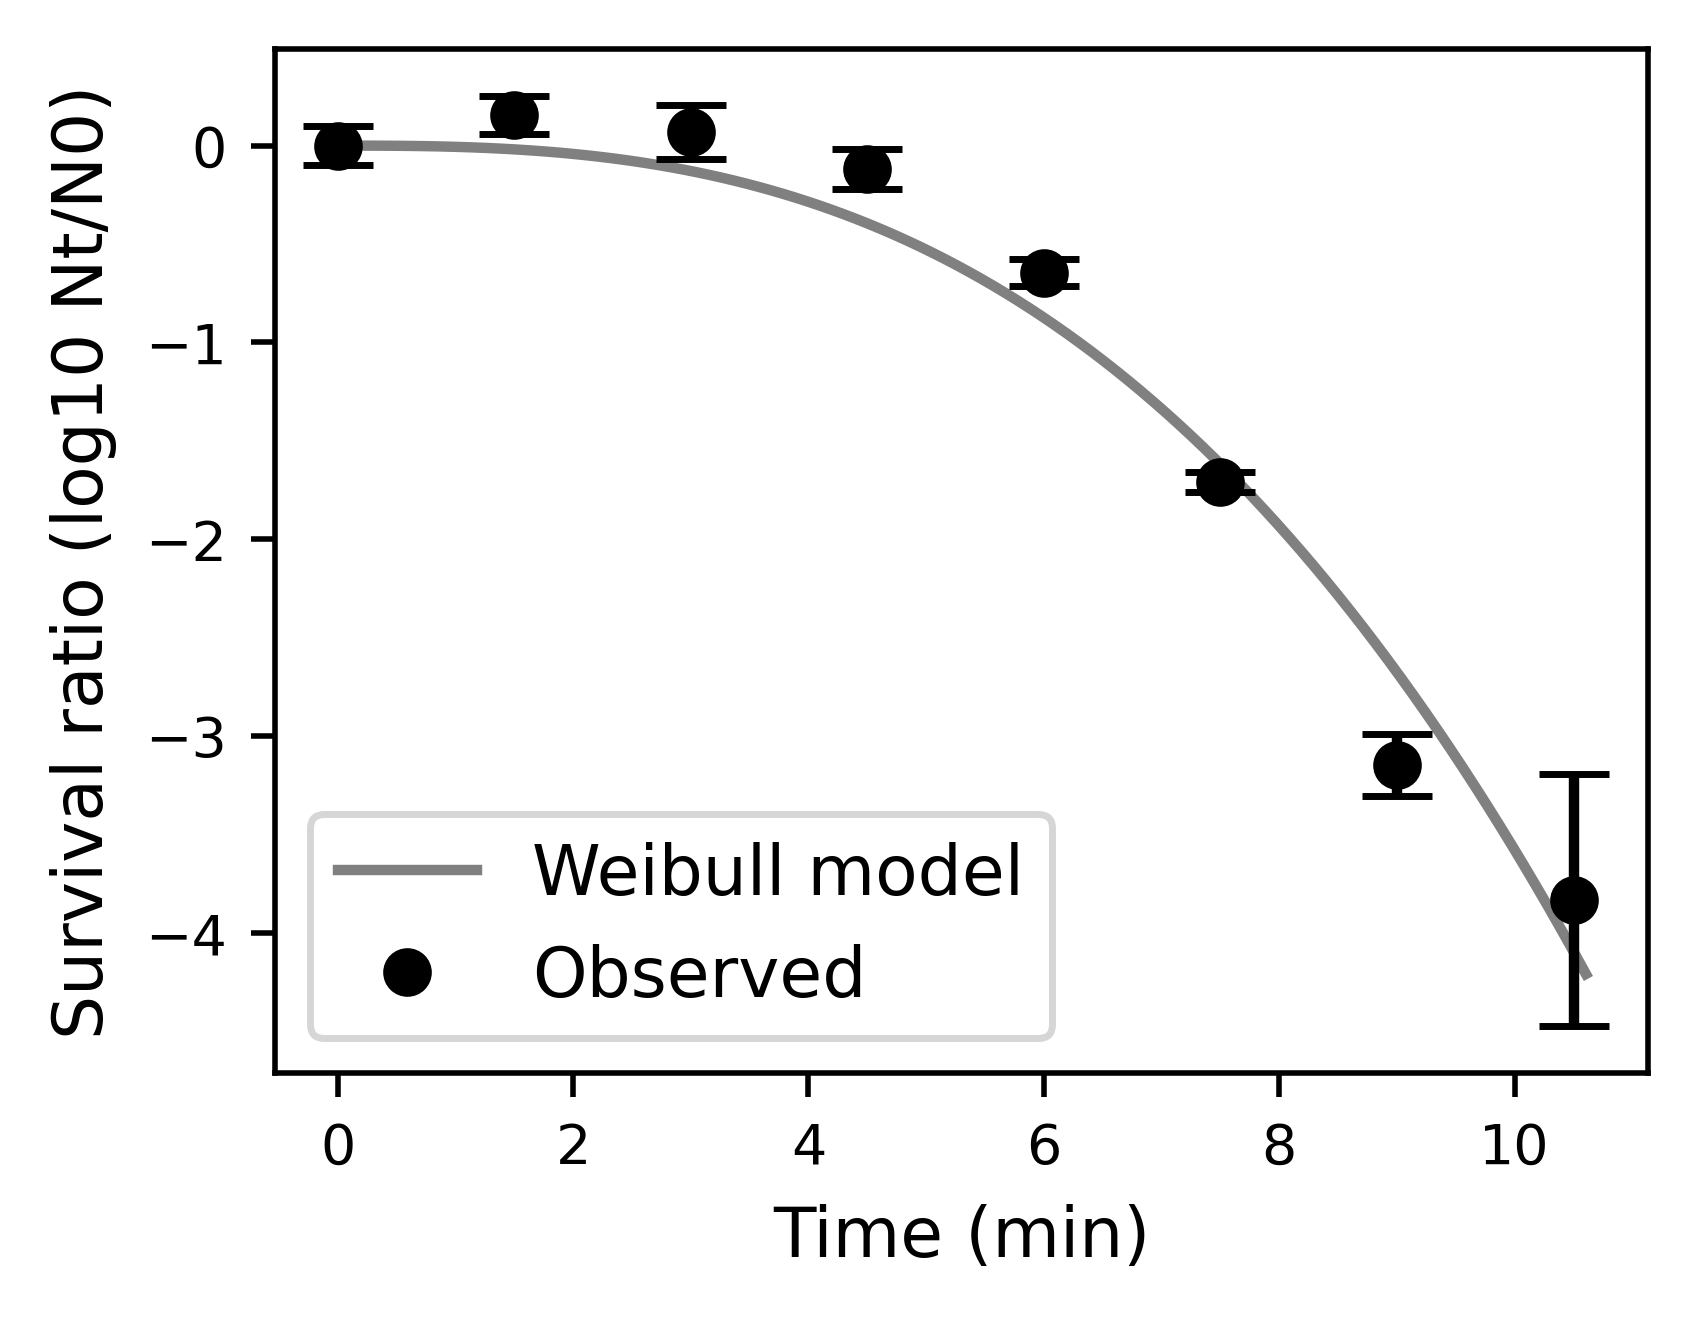

In [9]:
plt.figure(figsize=(9*0.393701,9*0.393701*3/4), dpi=500)

plt.xticks(size=8)
plt.yticks(size=8)
plt.xlabel("Time (min)",size=10)
plt.ylabel("Survival ratio (log10 Nt/N0)",size=10)

plt.plot(time_interval, y_pred, color='gray', label='Weibull model' )

plt.plot(time_list, Means, lw=0, marker='o', color='black', label='Observed')
plt.errorbar(time_list, Means, yerr=y_sd, fmt="none", color='black', capsize = 5)

plt.legend()

plt.savefig(datafile_name.replace('.csv', '.pdf'), bbox_inches="tight", dpi=500)

plt.show()

RMSEの計算（各点からのRMSE）

In [10]:
y_pred_RMSE = func(data['time'], para_pred[0], para_pred[1])
errors = data['logS']-y_pred_RMSE
RMSE = (np.sum(errors**2)/len(errors))**0.5
print(RMSE)

0.3508032357559741
